In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel('data.xlsx')

In [24]:
df.head()

,Lifting Date,Dealer ID,Source Used,Season,Lift Volume
0,2015-04-01,151766,4,Not rainy,706
1,2015-04-08,200499,2,Not rainy,828
2,2015-04-15,218408,3,Not rainy,432
3,2015-04-22,151766,1,Not rainy,684
4,2015-04-29,155368,3,Not rainy,714


In [25]:
'''first we will make the lifting date as an datetime object and will set it as our index '''
df['Lifting Date'] = pd.to_datetime(df['Lifting Date'] , format = '%d/%m/%Y %H.%M.%S')

In [26]:
data = df.drop(['Lifting Date'], axis=1)
data.index = df['Lifting Date']

In [27]:
data.head()

,Dealer ID,Source Used,Season,Lift Volume
Lifting Date,,,,
2015-04-01,151766,4,Not rainy,706
2015-04-08,200499,2,Not rainy,828
2015-04-15,218408,3,Not rainy,432
2015-04-22,151766,1,Not rainy,684
2015-04-29,155368,3,Not rainy,714


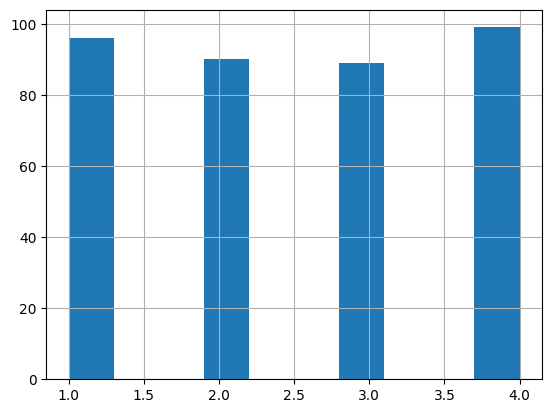

In [28]:
data['Source Used'].hist()
plt.show()

In [29]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [30]:
train.tail()

,Dealer ID,Source Used,Season,Lift Volume
Lifting Date,,,,
2020-11-18,214963,4,Not rainy,648
2020-11-25,151766,4,Not rainy,720
2020-12-02,173917,4,Not rainy,832
2020-12-09,155368,4,Not rainy,451
2020-12-16,198578,2,Not rainy,849


In [31]:
valid.head()

,Dealer ID,Source Used,Season,Lift Volume
Lifting Date,,,,
2020-12-23,162579,1,Not rainy,393
2020-12-30,173917,2,Not rainy,425
2021-01-06,173917,1,Not rainy,690
2021-01-13,159625,4,Not rainy,387
2021-01-20,151766,1,Not rainy,466


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Season'] = le.fit_transform(train['Season'])
valid['Season'] = le.fit_transform(valid['Season'])

C:\Users\chandan.sengupta\AppData\Local\Temp\ipykernel_13024\502944702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Season'] = le.fit_transform(train['Season'])
C:\Users\chandan.sengupta\AppData\Local\Temp\ipykernel_13024\502944702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Season'] = le.fit_transform(valid['Season'])


In [33]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

c:\Users\chandan.sengupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
